In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator

In [2]:
sns.set_context("paper")

In [3]:
IDkey = pd.read_csv('filtered_meta.txt',sep='\t')
scaden = pd.read_csv('ROSMAPpred_scadenall.csv',index_col=0)
tape = pd.read_csv('ROSMAPpred_tape.csv',index_col=0)
csx = pd.read_csv('ROSMAPpred_csx.csv',index_col=0)
rnasieve = pd.read_csv('ROSMAPpred_rnasieve.csv',index_col=0)
dwls = pd.read_csv('ROSMAPpred_dwlsmouse.txt',sep='\t',index_col=0)

In [4]:
rnasieve.index = tape.index
dwls.index = tape.index
scaden.index = tape.index

In [5]:
csx['Neurons'] = csx['InNeurons']+csx['ExNeurons']
rnasieve['Neurons'] = rnasieve['InNeurons']+rnasieve['ExNeurons']
tape['Neurons'] = tape['InNeurons']+tape['ExNeurons']
# scaden['Neurons'] = scaden['InNeurons']+scaden['ExNeurons']
#dwls['Neurons'] = dwls['InNeurons']+dwls['ExNeurons']

In [6]:
rnaseqid = list(IDkey['rnaseq_id'])
IDkey['rnaseq_id'] = rnaseqid

In [7]:
braaksc = list(IDkey['braaksc'])
ceradsc = list(IDkey['ceradsc'])
braak = []
cerad = []
intersection = tape.index.intersection(rnaseqid)
tape = tape.loc[intersection]
scaden = scaden.loc[intersection]
rnasieve = rnasieve.loc[intersection]
csx = csx.loc[intersection]
dwls = dwls.loc[intersection]
for seqid in tape.index:
    index = rnaseqid.index(seqid)
    braak.append(braaksc[index])
    cerad.append(ceradsc[index])
print(len(braak),len(cerad))

532 532


In [8]:
tape['braak'] = braak
scaden['braak'] = braak
tape['cerad'] = cerad
scaden['cerad'] = cerad
rnasieve['braak'] = braak
rnasieve['cerad'] = cerad
csx['braak'] = braak
csx['cerad'] = cerad
dwls['braak'] = braak
dwls['cerad'] = cerad

In [9]:
# tape = tape[tape['cerad']<=2]
# scaden = scaden[scaden['cerad']<=2]
# rnasieve = rnasieve[rnasieve['cerad']<=2]
# csx = csx[csx['cerad']<=2]
# dwls = dwls[dwls['cerad']<=2]

In [10]:
colors = sns.color_palette('colorblind',5)

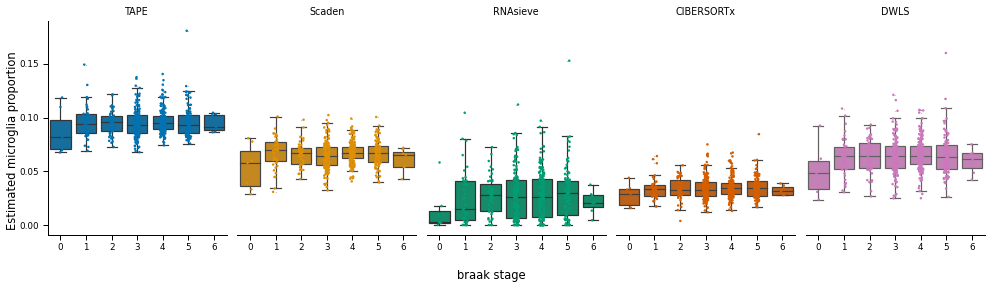

In [11]:
fig, axes = plt.subplots(1,5,sharex=True, sharey=True,figsize=(14,4))
data = [tape, scaden, rnasieve, csx, dwls]
name = ['TAPE','Scaden','RNAsieve','CIBERSORTx','DWLS']
y_major_locator=MultipleLocator(0.05)
for i in range(5):
    sns.stripplot(x='braak',y='Microglia',data=data[i],ax=axes[i],color=colors[i],marker='.')
    sns.boxplot(x='braak',y='Microglia',data=data[i],ax=axes[i],color=colors[i],fliersize=0.1)
    axes[i].set(xlabel=None,ylabel=None)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].yaxis.set_major_locator(y_major_locator)
    if i >= 1:
        axes[i].spines['left'].set_visible(False)
        axes[i].yaxis.set_visible(False)
    axes[i].set_title(name[i])
    
fig.supxlabel('braak stage')
fig.supylabel('Estimated microglia proportion')
plt.tight_layout()
plt.show()